# Regressão Linear Múltipla com Elimininação Retroativa

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import time

from functools import wraps
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Carregando Base de Dados

In [2]:
!rm -r MLUD
!git clone https://github.com/Crissky/MLUD.git

Cloning into 'MLUD'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 102 (delta 38), reused 31 (delta 4), pack-reused 0
Receiving objects: 100% (102/102), 86.29 KiB | 3.92 MiB/s, done.
Resolving deltas: 100% (38/38), done.


## Funções de Pré-Processamento

In [3]:
def loadDataset(filename):
    baseDeDados = pd.read_csv(filename, delimiter=';')
    X = baseDeDados.iloc[:,:-1].values
    y = baseDeDados.iloc[:,-1].values
    return X, y

def fillMissingData(X, inicioColuna, fimColuna):
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X[:,inicioColuna:fimColuna + 1] = imputer.fit_transform(X[:,inicioColuna:fimColuna + 1])
    return X

#só funciona se i = 0 ou i = ultima coluna
def computeCategorization(X, i):
    labelencoder_X = LabelEncoder()
    X[:, i] = labelencoder_X.fit_transform(X[:, i])

    #one hot encoding
    D = pd.get_dummies(X[:,i]).values
    if(i == 0):
        X = X[:,1:]
        X = np.insert(X, 0, D, axis=1)

        #removendo dummy variable trap
        X = X[:,1:]
    else:
        X = X[:,:i]
        for j in range(0, D.shape[1]):
            X = np.insert(X, i, D[:,j], axis=1)

        #removendo dummy variable trap
        X = X[:,:-1]
    return X

def splitTrainTestSets(X, y, testSize):
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = testSize)
    return XTrain, XTest, yTrain, yTest

def computeScaling(train, test):
    scaleX = StandardScaler()
    train = scaleX.fit_transform(train)
    test = scaleX.fit_transform(test)
    return train, test

## Regressão Linear

In [4]:
def computeLinearRegressionModel(XTrain, yTrain, XTest, yTest):
    regressor = LinearRegression()
    regressor.fit(XTrain, yTrain)
    #yPred = regressor.predict(XTest)

    #gerar grafico
    plt.scatter(XTest[:,-1], yTest, color="red")
    plt.plot(XTest[:,-1], regressor.predict(XTest), color="blue")
    plt.title("Inscritos x Visualizações (SVBR)")
    plt.xlabel("Total de Inscritos")
    plt.ylabel("Total de Visualizações")
    plt.show()

def runLinearRegressionExample(filename):
    start_time = time.time()
    X, y = loadDataset(filename)
    elapsed_time = time.time() - start_time
    print("Load Dataset: %.2f" % elapsed_time, "segundos.")

    start_time = time.time()
    X = fillMissingData(X, 1, X.shape[1])
    elapsed_time = time.time() - start_time
    print("Fill Missing Data: %.2f" % elapsed_time, "segundos.")

    start_time = time.time()
    X = computeCategorization(X, 0)
    elapsed_time = time.time() - start_time
    print("Compute Categorization: %.2f" % elapsed_time, "segundos.")

    start_time = time.time()
    XTrain, XTest, yTrain, yTest = splitTrainTestSets(X, y, 0.8)
    elapsed_time = time.time() - start_time
    print("Split Train Test sets: %.2f" % elapsed_time, "segundos.")

    start_time = time.time()
    computeLinearRegressionModel(XTrain, yTrain, XTest, yTest)
    elapsed_time = time.time() - start_time
    print("Compute Linear Regression: %.2f" % elapsed_time, "segundos.")    

Load Dataset: 0.01 segundos.
Fill Missing Data: 0.00 segundos.
Compute Categorization: 0.00 segundos.
Split Train Test sets: 0.00 segundos.


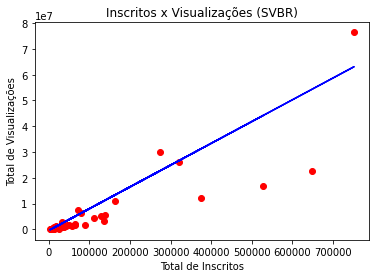

Compute Linear Regression: 0.18 segundos.


In [5]:
runLinearRegressionExample("MLUD/Aula06/svbr.csv")

## Regressão Linear Múltipla

In [6]:
def computeMultipleLinearRegressionModel(XTrain, yTrain, XTest, yTest):
    regressor = LinearRegression()
    regressor.fit(XTrain, yTrain)

    yPred = regressor.predict(XTest)
    print('\n#########################INÍCIO#########################')
    print('\nIniciando comparação:\nPREDITO | ESPERADO | DIFERENÇA\n')
    for i in range(0, yPred.shape[0]):
        print(yPred[i], yTest[i], abs(yPred[i] - yTest[i]))
        # time.sleep(0.5)
    print('\n##########################FIM##########################\n')
        
def computeMLRWithBackwardElimination(X, y, XTest):
    X = np.insert(X, 0, 1, axis=1)                    #Inserindo constante
    XOtimo = X[:,[0, 1, 2, 3, 4, 5, 6]]
    regressor = sm.OLS(y, XOtimo.astype(float)).fit() #OLS só funciona com float
    # print(regressor.summary())
    # print(XOtimo[1,:])

    XOtimo = X[:,[0, 1, 2, 3, 4, 6]]
    regressor = sm.OLS(y, XOtimo.astype(float)).fit()
    # print(regressor.summary())
    # print(XOtimo[1,:])
    
    XOtimo = X[:,[0, 1, 2, 3, 4]]
    regressor = sm.OLS(y, XOtimo.astype(float)).fit()
    # print(regressor.summary())
    # print(XOtimo[1,:])

    XOtimo = X[:,[0, 1, 2, 3]]
    regressor = sm.OLS(y, XOtimo.astype(float)).fit()
    # print(regressor.summary())
    # print(XOtimo[1,:])

    XOtimo = X[:,[0, 1, 2]]
    regressor = sm.OLS(y, XOtimo.astype(float)).fit()
    # print(regressor.summary())
    # print(XOtimo[1,:])

    XTest = XTest[:,[0, 1, 2]]

    return XOtimo, XTest

def computeAutomaticBackwardElimination(XTrain, yTrain, XTest, sl):
    XTrain = np.insert(XTrain, 0, 1, axis=1)                      #Inserindo constante
    XTest = np.insert(XTest, 0, 1, axis=1)                        #Inserindo constante
    numVars = len(XTrain[0])

    print()
    for i in range(0, numVars):
      regressor_OLS = sm.OLS(yTrain, XTrain.astype(float)).fit()  #OLS só funciona com float
      maxVar = max(regressor_OLS.pvalues).astype(float)
      if(maxVar > sl):
          for j in range(0, numVars - i):
              if(regressor_OLS.pvalues[j].astype(float) == maxVar):
                  print("Deletando coluna:", j)
                  XTrain = np.delete(XTrain, j, axis=1)
                  XTest = np.delete(XTest, j, axis=1)
    
    print()
    # regressor_OLS.summary()
    return XTrain, XTest
def runMultipleLinearRegressionExample(filename):
    start_time = time.time()
    X, y = loadDataset(filename)
    elapsed_time = time.time() - start_time
    print("Load Dataset: %.2f" % elapsed_time, "segundos.")

    start_time = time.time()
    X = fillMissingData(X, 1, 2)
    elapsed_time = time.time() - start_time
    print("Fill Missing Data: %.2f" % elapsed_time, "segundos.")

    start_time = time.time()
    X = computeCategorization(X, 3)
    elapsed_time = time.time() - start_time
    print("Compute Categorization: %.2f" % elapsed_time, "segundos.")

    start_time = time.time()
    XTrain, XTest, yTrain, yTest = splitTrainTestSets(X, y, 0.8)
    elapsed_time = time.time() - start_time
    print("Split Train Test sets: %.2f" % elapsed_time, "segundos.")

    # start_time = time.time()
    # XTrain, XTest = computeMLRWithBackwardElimination(XTrain, yTrain, XTest)
    # elapsed_time = time.time() - start_time
    # print("Compute MLR with Backward Elimination: %.2f" % elapsed_time, "segundos.")

    start_time = time.time()
    XTrain, XTest = computeAutomaticBackwardElimination(XTrain, yTrain, XTest, 0.05)
    elapsed_time = time.time() - start_time
    print("Compute Automatic Backward Elimination: %.2f" % elapsed_time, "segundos.")

    start_time = time.time()
    computeMultipleLinearRegressionModel(XTrain, yTrain, XTest, yTest)
    elapsed_time = time.time() - start_time
    print("Compute Multiple Linear Regression: %.2f" % elapsed_time, "segundos.")

In [7]:
runMultipleLinearRegressionExample("MLUD/Aula06/insurance.csv")

Load Dataset: 0.01 segundos.
Fill Missing Data: 0.00 segundos.
Compute Categorization: 0.00 segundos.
Split Train Test sets: 0.00 segundos.

Deletando coluna: 6
Deletando coluna: 5
Deletando coluna: 4
Deletando coluna: 3

Compute Automatic Backward Elimination: 0.01 segundos.

#########################INÍCIO#########################

Iniciando comparação:
PREDITO | ESPERADO | DIFERENÇA

16923.4422233433 10461.9794 6461.4628233432995
12211.72864793185 21195.818 8984.08935206815
14178.794663450393 8219.2039 5959.590763450393
6037.710400423455 26125.674769999998 20087.96436957654
8704.288632068805 5708.866999999999 2995.4216320688056
20813.987701167505 9875.6804 10938.307301167506
14470.13470555947 25656.575259999998 11186.440554440527
13500.532003004657 36950.2567 23449.72469699534
6878.959763166567 18223.4512 11344.491436833432
13051.225574887172 22462.04375 9410.818175112829
7410.696396832485 4134.08245 3276.6139468324855
14557.776239185092 6551.7501 8006.026139185092
20195.19367913856